In [1]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/AIM/'
sys.path.append(gdrive_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -l /content/gdrive/MyDrive/AIM/*.py

-rw------- 1 root root   343 Jun  3 14:17 /content/gdrive/MyDrive/AIM/aim_overlayer.py
-rw------- 1 root root  3426 Jun  3 21:05 /content/gdrive/MyDrive/AIM/aim_rater.py
-rw------- 1 root root 10308 Jun  3 17:07 /content/gdrive/MyDrive/AIM/aim_scanner.py
-rw------- 1 root root   909 Jun  3 14:37 /content/gdrive/MyDrive/AIM/aim_tuner.py
-rw------- 1 root root  7109 Jun  3 14:17 /content/gdrive/MyDrive/AIM/aim_util.py
-rw------- 1 root root 12960 Jun  3 15:51 /content/gdrive/MyDrive/AIM/aim_xformer.py


In [2]:
!pip install fuzzywuzzy

In [3]:
#import aim_tuner
import aim_util
import aim_xformer
#import aim_scanner
#import aim_overlayer

import aim_rater

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

groundtruth_list => ['sunnyday', 'day', 'breeze', 'tulip', 'light', 'parrot', 'summertime', 'cloud']
prediction list => ['sunny', 'days', 'moonbreeze', 'atulip', 'lighti', 'parnot', 'summmer', 'cloudy']
Groundtruth list length: 8
Prediction list length: 8
Exact match percentage: 0.0% with exact match count 0
Partial match percentage: 62.5% with exact match count 5

Matching words:
[]

Partially Matching words:
['days', 'atulip', 'lighti', 'parnot', 'cloudy']

Mismatched words:
['sunny', 'moonbreeze', 'summmer']


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [25]:
# def plot_matchA(transform_names, exact_match_values, partial_match_values):
#     plt.figure(figsize=(10, 6))
#     plt.bar(transform_names, exact_match_values, label='Exact Match')
#     plt.bar(transform_names, partial_match_values, bottom=exact_match_values, label='Partial Match', color='C1')

#     ax = plt.gca()
#     for tick, exact_val, partial_val in zip(ax.get_xticks(), exact_match_values, partial_match_values):
#         print(f"tick->{tick}, exact_val->{exact_val}, partial_val->{partial_val}")
#         total_val = exact_val + partial_val

#         total_val_str = "{:.2f}".format(total_val)
#         exact_val_str = "{:.2f}".format(exact_val)
#         partial_val_str = "{:.2f}".format(partial_val)
#         #print(f"exact_val_str->{exact_val_str}, partial_val_str->{partial_val_str}")
#         ax.text(tick, total_val + 1.5, f'{total_val_str}%', ha='center', va='bottom')

#         # use partial_val as X coord for exact_val, use eaxct_val+ as X coord for partial_val
#         # NOTE: if partial_val is zero, histogram will be somewaht misaligned
#         ax.text(tick, partial_val + 0.5, f'{exact_val_str}%', ha='center', va='bottom', color='orange')
#         ax.text(tick, exact_val + 3.5, f'{partial_val_str}%', ha='center', va='top', color='green')

#     plt.ylabel('Match Percentage')
#     plt.xlabel('Transformation')
#     plt.legend()
#     plt.show()

#**Ratings**

**noise -> top xform-> xform3a with top percent->79.29515418502201**

grayscale -> top xform-> xform1c with top percent->78.19383259911895

source -> top xform-> xform0 with top percent->77.7533039647577

contrast -> top xform-> xform5a with top percent->77.31277533039646

threshold -> top xform-> xform2a with top percent->61.45374449339208

sharpen -> top xform-> xform4b with top percent->55.506607929515425


In [14]:
def rate_xform_set(transform, groundtruth_list, prediction_list, transform_names, exact_match_values, partial_match_values, print_list=True):
    print(f"=========={transform}===========")
    match_count, partial_match_count, exact_match_percentage, partial_match_percentage = aim_rater.rate_match(groundtruth_list, eval(f'pred_{transform}_list'))
    exact_match_values.append(exact_match_percentage)
    partial_match_values.append(partial_match_percentage)
    transform_names.append(transform)

    return transform_names, exact_match_values, partial_match_values

#**Source**

In [11]:
# construct source pred list
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform0_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform0_list = file_to_list(pred_xform0_path)
#print(str(pred_xform0_list))

['united', 'states', 'of', 'america', 'luere', 'ralling', 'state', 'of', 'iowa', 'sss', 'co', 'scott', 'cunty', 'be', 'it', 'renteutbeted', 'that', 'at', 'term', 'or', 'the', 'district', 'court', 'holden', 'and', 'for', 'said', 'county', 'the', 'ovcm', 'elc', 'city', 'of', 'davenport', 'theein', 'on', 'the', 'day', 'of', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundre', 'and', 'susty', 'fuw', 'was', 'present', 'the', 'hororable', 'je', 'scott', 'richmany', 'sole', 'prsiding', 'judge', 'john', 'me', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'gifford', 'clerk', 'of', 'said', 'court', 'whenthe', 'fol', 'lowing', 'among', 'other', 'roceedings', 'were', 'had', 'towits', 'anws', 'cans', 'olen', 'native', 'of', 'loc', 'prcsens', 'resian', 'vltmm', 'said', 'stater', 'appeared', 'lile', 'open', 'cout', 'icctolente', 'be', 'aemitted', 'oeceme', 'citizen', 'of', 'thie', 'uited', 'states', 'and', 'it', 'appearing', 'to', 'the', 'satifaction', 'of', 'th

In [15]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform0']
#print(str(pred_xform0_list))
#transform_names, exact_match_values, partial_match_values = aim_rater.rate_xform_set(transform_list[0], groundtruth_list, pred_xform0_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform0_list, transform_names, exact_match_values, partial_match_values)
total_percent = exact_match_values[0] + partial_match_values[0]
print(f"\npercent match-> total {total_percent}%, exact {exact_match_values[0]}%, partial {partial_match_values[0]}% for source pred word list->{pred_xform0_path}")

['united', 'states', 'of', 'america', 'luere', 'ralling', 'state', 'of', 'iowa', 'sss', 'co', 'scott', 'cunty', 'be', 'it', 'renteutbeted', 'that', 'at', 'term', 'or', 'the', 'district', 'court', 'holden', 'and', 'for', 'said', 'county', 'the', 'ovcm', 'elc', 'city', 'of', 'davenport', 'theein', 'on', 'the', 'day', 'of', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundre', 'and', 'susty', 'fuw', 'was', 'present', 'the', 'hororable', 'je', 'scott', 'richmany', 'sole', 'prsiding', 'judge', 'john', 'me', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'gifford', 'clerk', 'of', 'said', 'court', 'whenthe', 'fol', 'lowing', 'among', 'other', 'roceedings', 'were', 'had', 'towits', 'anws', 'cans', 'olen', 'native', 'of', 'loc', 'prcsens', 'resian', 'vltmm', 'said', 'stater', 'appeared', 'lile', 'open', 'cout', 'icctolente', 'be', 'aemitted', 'oeceme', 'citizen', 'of', 'thie', 'uited', 'states', 'and', 'it', 'appearing', 'to', 'the', 'satifaction', 'of', 'th

# **Grayscale**

In [17]:
# construct grayscale pred lists
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform1a_path = '/content/gdrive/MyDrive/AIM/citizen_xform1a_word_list.txt'
pred_xform1b_path = '/content/gdrive/MyDrive/AIM/citizen_xform1b_word_list.txt'
pred_xform1c_path = '/content/gdrive/MyDrive/AIM/citizen_xform1c_word_list.txt'
pred_xform1d_path = '/content/gdrive/MyDrive/AIM/citizen_xform1d_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform1a_list = file_to_list(pred_xform1a_path)
pred_xform1b_list = file_to_list(pred_xform1b_path)
pred_xform1c_list = file_to_list(pred_xform1c_path)
pred_xform1d_list = file_to_list(pred_xform1d_path)

In [21]:
total_percent = 99.81098393097970
print(format(total_percent, ".2f"))
#print(f"transform->xform0 total percentage->{format(total_percent, ".2f")}")


99.81


==========xform1a===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court

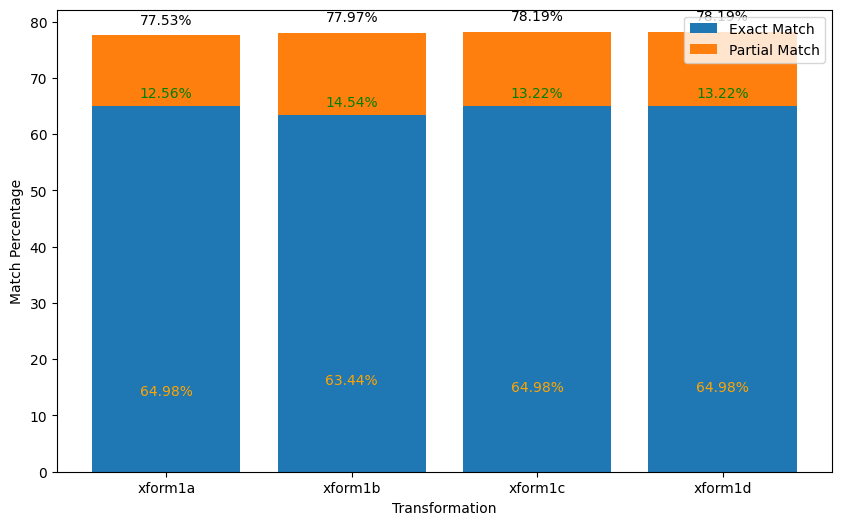

transform->xform1a total percentage->77.5330396475771
transform->xform1b total percentage->77.97356828193833
transform->xform1c total percentage->78.19383259911895
transform->xform1d total percentage->78.19383259911895

top xform-> xform1c with top percent->78.19


In [25]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform1a', 'xform1b', 'xform1c', 'xform1d']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform1a_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], groundtruth_list, pred_xform1b_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], groundtruth_list, pred_xform1c_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[3], groundtruth_list, pred_xform1d_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")

    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

# **Threshold**

In [27]:
# construct threshold pred lists
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform2a_path = '/content/gdrive/MyDrive/AIM/citizen_xform2a_word_list.txt'
pred_xform2b_path = '/content/gdrive/MyDrive/AIM/citizen_xform2b_word_list.txt'
pred_xform2c_path = '/content/gdrive/MyDrive/AIM/citizen_xform2c_word_list.txt'
pred_xform2d_path = '/content/gdrive/MyDrive/AIM/citizen_xform2d_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform2a_list = file_to_list(pred_xform2a_path)
pred_xform2b_list = file_to_list(pred_xform2b_path)
pred_xform2c_list = file_to_list(pred_xform2c_path)
pred_xform2d_list = file_to_list(pred_xform2d_path)

==========xform2a===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court

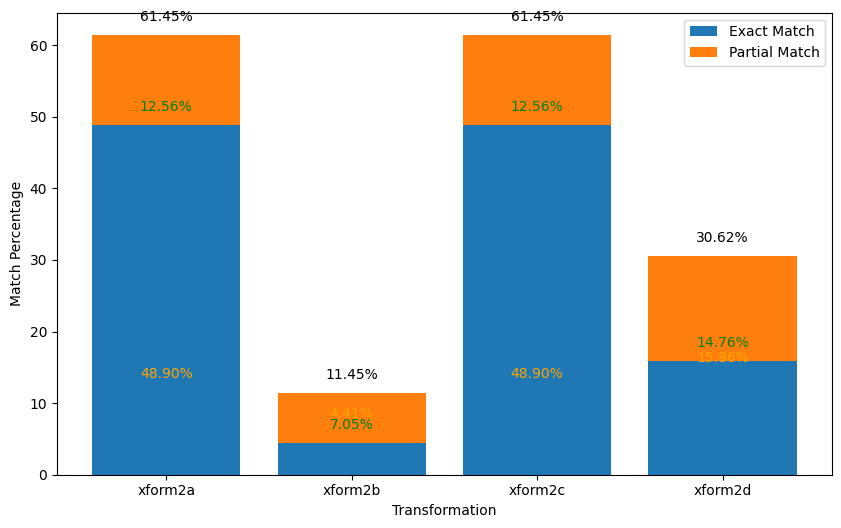

transform->xform2a total percentage->61.45374449339208
transform->xform2b total percentage->11.453744493392072
transform->xform2c total percentage->61.45374449339208
transform->xform2d total percentage->30.61674008810573

top xform-> xform2a with top percent->61.45


In [32]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform2a', 'xform2b', 'xform2c', 'xform2d']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform2a_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], groundtruth_list, pred_xform2b_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], groundtruth_list, pred_xform2c_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[3], groundtruth_list, pred_xform2d_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")
    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

# ** Noise Reduction **

In [30]:
# construct threshold pred lists
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform3a_path = '/content/gdrive/MyDrive/AIM/citizen_xform3a_word_list.txt'
pred_xform3b_path = '/content/gdrive/MyDrive/AIM/citizen_xform3b_word_list.txt'
pred_xform3c_path = '/content/gdrive/MyDrive/AIM/citizen_xform3c_word_list.txt'
pred_xform3d_path = '/content/gdrive/MyDrive/AIM/citizen_xform3d_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform3a_list = file_to_list(pred_xform3a_path)
pred_xform3b_list = file_to_list(pred_xform3b_path)
pred_xform3c_list = file_to_list(pred_xform3c_path)
pred_xform3d_list = file_to_list(pred_xform3d_path)

==========xform3a===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court

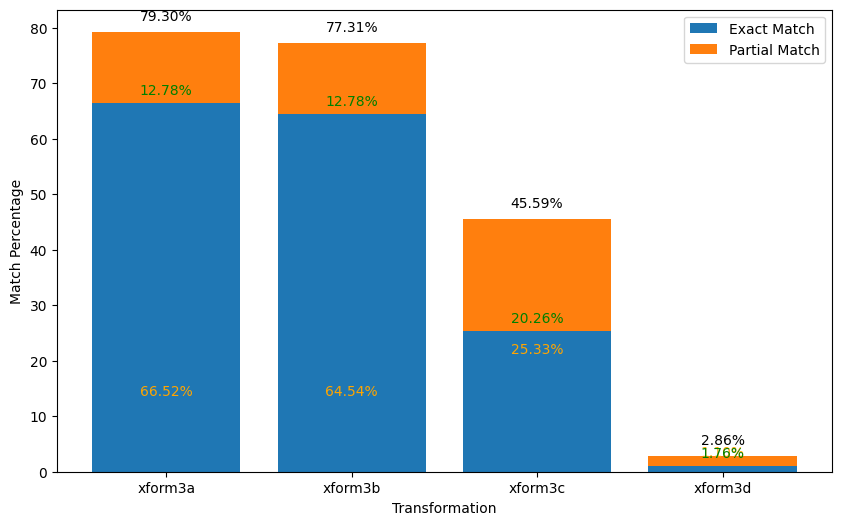

transform->xform3a total percentage->79.29515418502201
transform->xform3b total percentage->77.31277533039648
transform->xform3c total percentage->45.59471365638767
transform->xform3d total percentage->2.863436123348018

top xform-> xform3a with top percent->79.30


In [33]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform3a', 'xform3b', 'xform3c', 'xform3d']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform3a_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], groundtruth_list, pred_xform3b_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], groundtruth_list, pred_xform3c_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[3], groundtruth_list, pred_xform3d_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")
    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

#**Sharpen**

In [34]:
# construct threshold pred lists
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform4a_path = '/content/gdrive/MyDrive/AIM/citizen_xform4a_word_list.txt'
pred_xform4b_path = '/content/gdrive/MyDrive/AIM/citizen_xform4b_word_list.txt'
pred_xform4c_path = '/content/gdrive/MyDrive/AIM/citizen_xform4c_word_list.txt'
pred_xform4d_path = '/content/gdrive/MyDrive/AIM/citizen_xform4d_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform4a_list = file_to_list(pred_xform4a_path)
pred_xform4b_list = file_to_list(pred_xform4b_path)
pred_xform4c_list = file_to_list(pred_xform4c_path)
pred_xform4d_list = file_to_list(pred_xform4d_path)

==========xform4a===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court

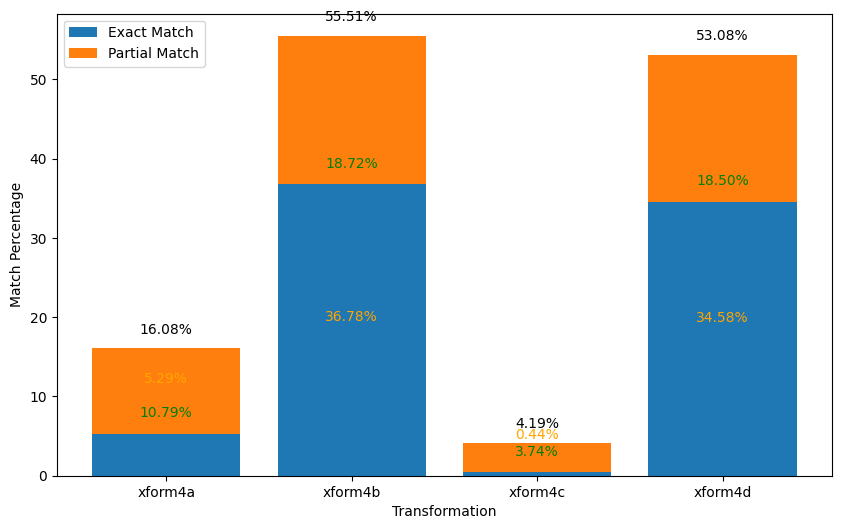

transform->xform4a total percentage->16.079295154185022
transform->xform4b total percentage->55.506607929515425
transform->xform4c total percentage->4.185022026431718
transform->xform4d total percentage->53.08370044052864

top xform-> xform4b with top percent->55.51


In [35]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform4a', 'xform4b', 'xform4c', 'xform4d']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform4a_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], groundtruth_list, pred_xform4b_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], groundtruth_list, pred_xform4c_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[3], groundtruth_list, pred_xform4d_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")
    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

#**Contrast**

In [36]:
# construct threshold pred lists
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'

pred_xform5a_path = '/content/gdrive/MyDrive/AIM/citizen_xform5a_word_list.txt'
pred_xform5b_path = '/content/gdrive/MyDrive/AIM/citizen_xform5b_word_list.txt'
pred_xform5c_path = '/content/gdrive/MyDrive/AIM/citizen_xform5c_word_list.txt'
pred_xform5d_path = '/content/gdrive/MyDrive/AIM/citizen_xform5d_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform5a_list = file_to_list(pred_xform5a_path)
pred_xform5b_list = file_to_list(pred_xform5b_path)
pred_xform5c_list = file_to_list(pred_xform5c_path)
pred_xform5d_list = file_to_list(pred_xform5d_path)

==========xform5a===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court

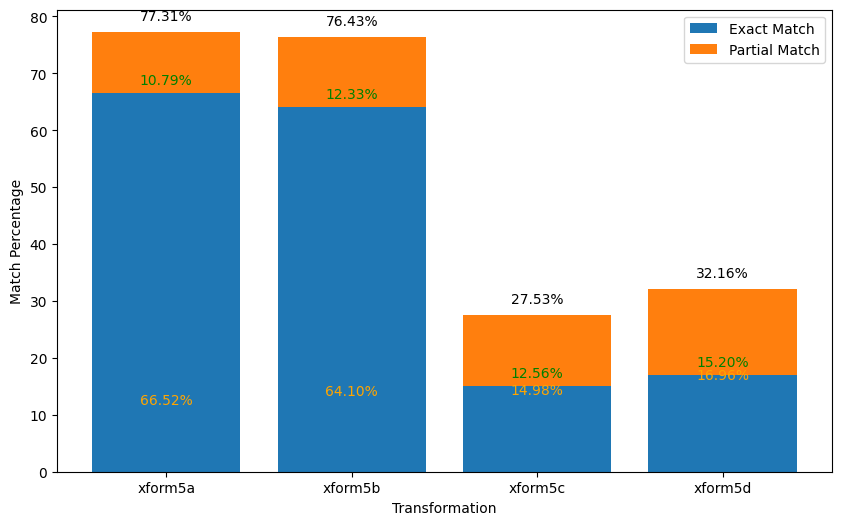

transform->xform5a total percentage->77.31277533039646
transform->xform5b total percentage->76.431718061674
transform->xform5c total percentage->27.53303964757709
transform->xform5d total percentage->32.158590308370044

top xform-> xform5a with top percent->77.31


In [37]:
transform_names = []
exact_match_values = []
partial_match_values = []

# transformations = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']
transform_list = ['xform5a', 'xform5b', 'xform5c', 'xform5d']

transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[0], groundtruth_list, pred_xform5a_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[1], groundtruth_list, pred_xform5b_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[2], groundtruth_list, pred_xform5c_list, transform_names, exact_match_values, partial_match_values)
transform_names, exact_match_values, partial_match_values = rate_xform_set(transform_list[3], groundtruth_list, pred_xform5d_list, transform_names, exact_match_values, partial_match_values)

aim_rater.plot_matchA(transform_names, exact_match_values, partial_match_values)

top_percent = 0
top_xform = ""
for i in range(len(transform_names)):
    total_percent = exact_match_values[i] + partial_match_values[i]
    print(f"transform->{transform_names[i]} total percentage->{total_percent}")
    if total_percent > top_percent:
        top_percent = total_percent
        top_xform = transform_names[i]

total_percent2f = format(top_percent, ".2f")
print(f"\ntop xform-> {top_xform} with top percent->{total_percent2f}")

**prelim pipeline below**

In [ ]:
import ast

groundtruth_path = '/content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt'
pred_xform0_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_word_list.txt'
pred_xform1_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform1_carlv_word_list.txt'
pred_xform2_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform2_carlv_word_list.txt'
pred_xform3_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform3_carlv_word_list.txt'
pred_xform4_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform4_carlv_word_list.txt'
pred_xform5_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform5_carlv_word_list.txt'

def file_to_list(path):
    with open(path, 'r') as f:
        target_list = ast.literal_eval(f.read())
    return target_list

groundtruth_list = file_to_list(groundtruth_path)
pred_xform0_list = file_to_list(pred_xform0_path)
pred_xform1_list = file_to_list(pred_xform1_path)
pred_xform2_list = file_to_list(pred_xform2_path)
pred_xform3_list = file_to_list(pred_xform3_path)
pred_xform4_list = file_to_list(pred_xform4_path)
pred_xform5_list = file_to_list(pred_xform5_path)

==========xform0===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court'

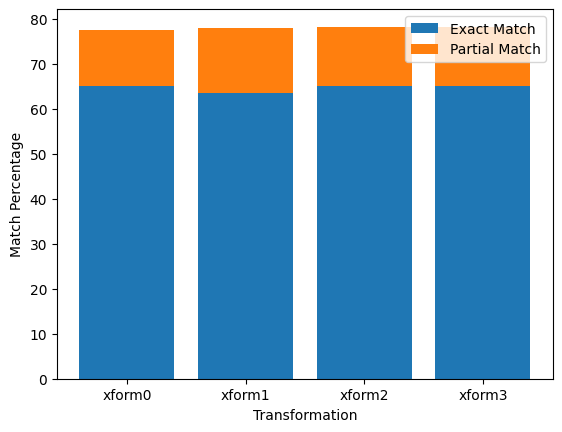

In [ ]:
print(f"==========xform0===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform0_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[0])
print(f"==========xform1===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform1_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[1])
print(f"==========xform2===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform2_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[2])
print(f"==========xform3===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform3_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[3])

plt.bar(transformation_names, exact_match_values, label='Exact Match')
plt.bar(transformation_names, partial_match_values, bottom=exact_match_values, label='Partial Match', color='C1')

plt.ylabel('Match Percentage')
plt.xlabel('Transformation')
plt.legend()
plt.show()

In [ ]:
print(f"==========xform0===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform0_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[0])
print(f"==========xform1===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform1_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[1])
print(f"==========xform2===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform2_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[2])
print(f"==========xform3===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform3_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[3])
print(f"==========xform4===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform4_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[4])
print(f"==========xform5===========")
matches, partial_matches, exact_match_percentage, partial_match_percentage = rate_match(groundtruth_list, pred_xform5_list)
exact_match_values.append(exact_match_percentage)
partial_match_values.append(partial_match_percentage)
transformation_names.append(transformations[5])

==========xform0===========
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', 'said', 'state', 'appeared', 'in', 'open', 'court'

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# Model A
# plt.hist([exact_match_values, partial_match_values], label=['Exact Match', 'Partial Match'], bins=20)
# plt.xlabel('Match Percentage')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()
plt.bar(transformation_names, exact_match_values, label='Exact Match')
plt.bar(transformation_names, partial_match_values, bottom=exact_match_values, label='Partial Match', color='C1')

plt.ylabel('Match Percentage')
plt.xlabel('Transformation')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

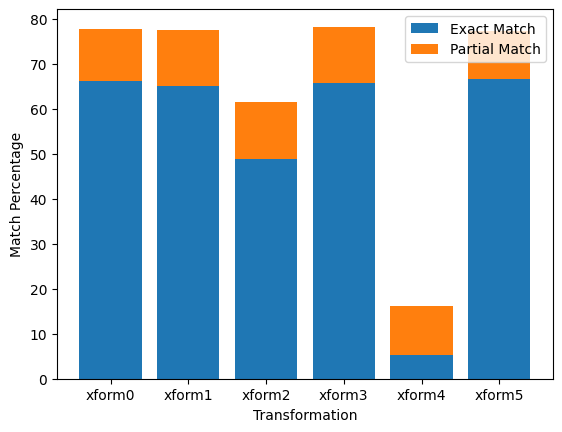

In [ ]:
# Model B
# plt.hist([exact_match_values, partial_match_values], label=['Exact Match', 'Partial Match'], bins=20)
# plt.xlabel('Match Percentage')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()
plt.bar(transformation_names, exact_match_values, label='Exact Match')
plt.bar(transformation_names, partial_match_values, bottom=exact_match_values, label='Partial Match')
plt.ylabel('Match Percentage')
plt.xlabel('Transformation')
plt.legend()
plt.show()

**NO GIBBERISH DETECTED!**

In [ ]:
!pip install random_string_detector

In [ ]:
from random_string_detector import RandomStringDetector

detector = RandomStringDetector()

def scrub_pred_list(pred_list, print_list=True):
  keyword_list = []
  gibberish_list = []

  for s in pred_list:
      #print(s)
      if detector(s) or len(s)<2:
          gibberish_list.append(s)
      else:
          keyword_list.append(s)

  print("Keyword list length:", len(keyword_list))
  print(f"Gibberish list length:{len(gibberish_list)}")
  if print_list:
    print(f"Gibberish list:{gibberish_list}")

  return keyword_list

In [ ]:
# pred_list = ['united', 'states', 'of', 'america', 'luere', 'ralling', 'o', 'o', 'v', 'state', 'of', 'iowa', 'sss', 'co', 'scott', 'cunty', 'be', 'it', 'renteutbeted', 'that', 'at', 'e', 'term', 'or', 'the', 'district', 'court', 'holden', 'n', 'and', 'for', 'said', 'county', 'n', 'the', 'e', 'ovcm', 'elc', 'city', 'of', 'davenport', 'theein', 'on', 'the', 'day', 'of', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'o', 'susty', 'thousand', 'eight', 'hundre', 'and', 'fuw', 'was', 'present', 'the', 'hororable', 'je', 'scott', 'richmany', 'sole', 'prsiding', 'judge', 'john', 'me', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 't', 'gifford', 'clerk', 'of', 'said', 'court', 'whenthe', 'fol', 'v', 'anws', 'cans', 'olen', 'lowing', 'among', 'other', 'roceedings', 'were', 'had', 'towits', 's', 'a', 'native', 'of', 'a', 'loc', 'prcsens', 'resian', 'vltmm', 'said', 'stater', 'appeared', 'lile', 'open', 'cout', 'icctolente', 'be', 'aemitted', 'oeceme', 'v', 'a', 'citizen', 'of', 'thie', 'uited', 'states', 'oww', 'and', 'it', 'roadwo', 'appearing', 'to', 'cot', 'the', 'oo', 'satifaction', 'of', 'ssked', 'the', 'court', 'that', 'oouns', 'he', 'had', 'declaredn', 'oath', 'c', 'before', 'e', 'a', 'court', 'gf', 'record', 'heing', 'common', 'law', 'jurisdiction', 'and', 'using', 'cl', 'sal', 'two', 'years', 'at', 'least', 'before', 'his', 'admissions', 'that', 'it', 'e', 'was', 'bona', 'fide', 'his', 'inter', 'tion', 'to', 'become', 'a', 'citizen', 'of', 'the', 'united', 'states', 'and', 'to', 'renounce', 'forever', 'all', 'allegiance', 'to', 'cas', 'o', 'foreign', 'prince', 'potentater', 'state', 'or', 'sovereigntys', 'whatsoever', 'and', 'particularly', 'to', 'iw', 'wedens', 'o', 'subile', 'of', 'wh', 'he', 'was', 'heretofore', 'a', 'and', 'laid', 'applicant', 'having', 'declared', 'on', 'oath', 'before', 'this', 'co', 'court', 'that', 'he', 'will', 'support', 'the', 'constitution', 'of', 'the', 'united', 'statess', 'nd', 'that', 'he', 'doth', 'absolutely', 'and', 'entirely', 'renounce', 's', 'and', 'abjure', 'all', 'allegiance', 'and', 'fidelity', 'to', 'every', 'foreign', 'princer', 'poentater', 'state', 'or', 'sovereigntys', 'whatsoever', 'nd', 'pars', 'ticularly', 'to', 'the', 'power', 'above', 'named', 'the', 'court', 'being', 'satisfied', 'that', 'said', 'applicant', 'has', 'resided', 'within', 'the', 'united', 'o', 'states', 'for', 'the', 'term', 'offive', 'years', 'next', 'preceeding', 'his', 'admission', 'without', 'being', 'at', 'any', 'time', 'during', 'the', 'said', 'fre', 'years', 'out', 'of', 'the', 'territory', 'of', 'the', 'united', 'states', 'and', 'within', 'this', 'state', 'onc', 'year', 'at', 'leasty', 'and', 'it', 'further', 'appearing', 'to', 'the', 'n', 'n', 'satisfaction', 'of', 'this', 'court', 'that', 'during', 'that', 'time', 'he', 'has', 'behaved', 'as', 'a', 'man', 'of', 'good', 'moral', 'character', 'attached', 'to', 'the', 'n', 'constitution', 'of', 'the', 'united', 'states', 'and', 'well', 'disposed', 'to', 'the', 'good', 'order', 'and', 'happiness', 'of', 'the', 'same', 'thereuon', 'the', 'court', 'admitted', 'the', 'sald', 'applicant', 'to', 'become', 'a', 'citizen', 'of', 'tho', 'unitod', 'states', 'and', 'ordered', 'all', 'proceedings', 'aoresaid', 'eo', 'to', 'e', 'be', 'entere', 'dl', 'eeo', 'llic', 'cout', 's', 'y', 'testimotty', 'aleeon', 'l', 'ira', 'm', 'giffordy', 'olerk', 'of', 'the', 'court', 'aforesaul', 'have', 'si', 'hereto', 'set', 'my', 'hand', 'and', 'aflxed', 'the', 'seal', 'of', 'sauid', 'court', 'at', 'ofice', 'in', 'hes', 'city', 'e', 'of', 'dawenport', 'in', 'said', 'county', 'this', 'the', 'seen', 'day', 's', 'nnem', 'bes', 'in', 'the', 'year', 'of', 'ourlord', 'one', 'thousanl', 'eight', 'hundred', 'and', 'sixty', 'sangezc', 'clerk', 'f', 'district', 'court', 'n']

# print(f"==========unfiltered===========")
# rate_match(groundtruth_list, pred_list)

# print(f"==========no nonsense===========")
# rate_match(groundtruth_list, keyword_list)

In [ ]:
# print(pred_xform2_list)
# pred_list = scrub_pred_list(pred_xform2_list)
# print(pred_list)

In [ ]:
print(f"==========xform0===========")
pred_list = scrub_pred_list(pred_xform0_list, False)
rate_match(groundtruth_list, pred_list, False)
print(f"==========xform1===========")
pred_list = scrub_pred_list(pred_xform1_list, False)
rate_match(groundtruth_list, pred_list, False)
print(f"==========xform2===========")
pred_list = scrub_pred_list(pred_xform2_list, False)
rate_match(groundtruth_list, pred_list, False)
print(f"==========xform3===========")
pred_list = scrub_pred_list(pred_xform3_list, False)
rate_match(groundtruth_list, pred_list, False)
print(f"==========xform4===========")
pred_list = scrub_pred_list(pred_xform4_list, False)
rate_match(groundtruth_list, pred_list, False)
print(f"==========xform5===========")
pred_list = scrub_pred_list(pred_xform5_list, False)
rate_match(groundtruth_list, pred_list, False)

==========xform0===========
Keyword list length: 411
Gibberish list length:1
groundtruth_list => ['united', 'states', 'of', 'america', 'our', 'liberty', 'we', 'prize', 'and', 'out', 'rights', 'we', 'will', 'maintain', 'state', 'of', 'iowa', 'ss:', 'scott', 'county', 'be', 'it', 'remembered', 'that', 'at', 'a', 'term', 'of', 'the', 'district', 'court', 'holden', 'in', 'and', 'for', 'said', 'county', 'in', 'the', 'city', 'of', 'davenport', 'therein', 'on', 'the', '7', 'day', 'of', 'november', 'in', 'the', 'year', 'of', 'our', 'lord', 'one', 'thousand', 'eight', 'hundred', 'sixtyfour', 'was', 'presentthe', 'honorable', 'j.', 'scott', 'richman', 'sole', 'presiding', 'judge', 'john', 'm.', 'lyter', 'sheriff', 'of', 'said', 'county', 'and', 'ira', 'm.', 'gifford', 'clerk', 'of', 'said', 'court', 'when', 'the', 'fol-', 'lowing', 'among', 'other', 'proceedings', 'were', 'had', 'to', 'wit:', 'hans', 'claus', 'olson', 'a', 'native', 'of', 'norway', 'and', 'at', 'present', 'residing', 'within', '

(302, 49, 66.51982378854625, 10.79295154185022)